In [1]:
from utils import get_schedule

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler
from stable_baselines3.common.utils import get_linear_fn

eps_schedule = get_schedule('StepLR',
                            initial_value=1e-4,
                            schedule_kwargs={'step_size': 100, 'gamma': 0.7})

['2.8248e-06', '8.2354e-06', '1.6807e-05', '4.9000e-05', '1.0000e-04']


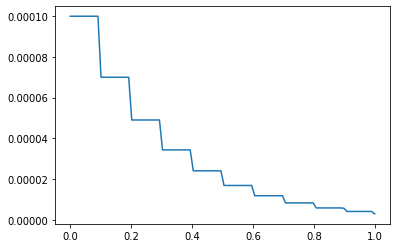

In [39]:
x = np.linspace(0, 1, 100)
plt.plot(x[::-1], eps_schedule(x))
print([f'{x:.4e}' for x in eps_schedule(np.linspace(0,1,5))])

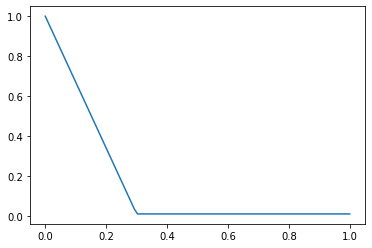

In [23]:
eps_linear = get_linear_fn(1.0, 0.01, 0.3)
plt.plot(np.linspace(0, 1, 100)[::-1], [eps_linear(x) for x in np.linspace(0, 1, 100)])

In [4]:
def custom_func(warmup=0.3, **schedule_kwargs):
    resolution = int(schedule_kwargs.get('resolution', 1000) * (1 - warmup))
    schedule_kwargs['resolution'] = resolution
    schedule = get_schedule(**schedule_kwargs)

    def fn(progress_remaining):
        if 1 - progress_remaining < warmup:
            return schedule_kwargs['initial_value']
        else:
            return schedule(progress_remaining + warmup)

    return fn

In [10]:
schedule = custom_func(warmup=0.3,
                       initial_value=1e-3,
                       schedule='MultiplicativeLR',
                       schedule_kwargs={'lr_lambda': lambda e: 0.99})

['7.2434e-06', '4.1946e-05', '2.4291e-04', '1.0000e-03', '1.0000e-03']


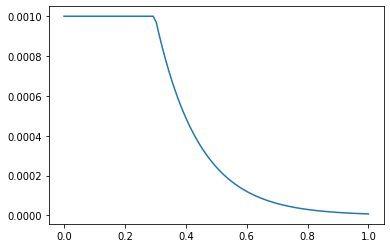

In [11]:
plt.plot(np.linspace(0, 1, 100)[::-1], [schedule(x) for x in np.linspace(0, 1, 100)])
print([f'{x:.4e}' for x in [schedule(x) for x in np.linspace(0, 1, 5)]])

In [10]:
from utils import get_schedule
import numpy as np
import matplotlib.pyplot as plt

schedule = get_schedule(schedule='MultiplicativeLR',
                        initial_value=1e-3,
                        warmup=0.4,
                        schedule_kwargs={'lr_lambda': lambda e: 0.99},
                        resolution=1000)

['2.6726e-05', '1.2038e-04', '5.4223e-04', '1.0000e-03', '1.0000e-03']


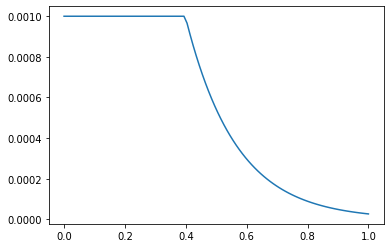

In [11]:
plt.plot(np.linspace(0, 1, 100)[::-1], [schedule(x) for x in np.linspace(0, 1, 100)])
print([f'{x:.4e}' for x in [schedule(x) for x in np.linspace(0, 1, 5)]])

['2.4050e-06', '2.9596e-05', '3.6420e-04', '1.0000e-03', '1.0000e-03']


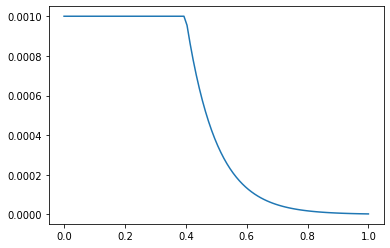

In [14]:
schedule = get_schedule(schedule='MultiplicativeLR',
                        initial_value=1e-3,
                        warmup=0.0,
                        schedule_kwargs={'lr_lambda': lambda e: 0.99 if e > 400 else 1},
                        resolution=1000)

plt.plot(np.linspace(0, 1, 100)[::-1], [schedule(x) for x in np.linspace(0, 1, 100)])
print([f'{x:.4e}' for x in [schedule(x) for x in np.linspace(0, 1, 5)]])